In [1]:
!pip install gensim


In [51]:
import gensim

import gensim.downloader
import pandas as pd

Part 1: Word Embeddings

In [3]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['dog']

# Getting the most similar words

print(model.most_similar('dog'))

# Getting the similarity between two words

print(model.similarity('dog', 'cat'))


[==================================================] 100.0% 128.1/128.1MB downloaded
[('cat', 0.8798074126243591), ('dogs', 0.8344309329986572), ('pet', 0.7449564337730408), ('puppy', 0.723637580871582), ('horse', 0.7109653949737549), ('animal', 0.6817063093185425), ('pig', 0.655417263507843), ('boy', 0.6545308232307434), ('cats', 0.6471932530403137), ('rabbit', 0.6468630433082581)]
0.8798075


In [4]:
dog

array([ 0.30817  ,  0.30938  ,  0.52803  , -0.92543  , -0.73671  ,
        0.63475  ,  0.44197  ,  0.10262  , -0.09142  , -0.56607  ,
       -0.5327   ,  0.2013   ,  0.7704   , -0.13983  ,  0.13727  ,
        1.1128   ,  0.89301  , -0.17869  , -0.0019722,  0.57289  ,
        0.59479  ,  0.50428  , -0.28991  , -1.3491   ,  0.42756  ,
        1.2748   , -1.1613   , -0.41084  ,  0.042804 ,  0.54866  ,
        0.18897  ,  0.3759   ,  0.58035  ,  0.66975  ,  0.81156  ,
        0.93864  , -0.51005  , -0.070079 ,  0.82819  , -0.35346  ,
        0.21086  , -0.24412  , -0.16554  , -0.78358  , -0.48482  ,
        0.38968  , -0.86356  , -0.016391 ,  0.31984  , -0.49246  ,
       -0.069363 ,  0.018869 , -0.098286 ,  1.3126   , -0.12116  ,
       -1.2399   , -0.091429 ,  0.35294  ,  0.64645  ,  0.089642 ,
        0.70294  ,  1.1244   ,  0.38639  ,  0.52084  ,  0.98787  ,
        0.79952  , -0.34625  ,  0.14095  ,  0.80167  ,  0.20987  ,
       -0.86007  , -0.15308  ,  0.074523 ,  0.40816  ,  0.0192

Part 1a

In [7]:

#find the most similar words to a word of your choice. 
#Does the result make sense? Look up some of the words if you don't know them
#Share and discuss with your group

print(model.most_similar('shotgun'))

[('12-gauge', 0.7354438304901123), ('shotguns', 0.6626276969909668), ('grenade', 0.6599388122558594), ('pistol', 0.6489194631576538), ('revolver', 0.6391271948814392), ('rifle', 0.6316377520561218), ('pistols', 0.6280089020729065), ('handgun', 0.6258585453033447), ('semiautomatic', 0.6202423572540283), ('bullet', 0.6142223477363586)]


In [ ]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))



[('paris', 0.8827144503593445), ('france', 0.755802571773529), ('french', 0.7075165510177612), ('prohertrib', 0.6943174004554749), ('berlin', 0.666556179523468), ('brussels', 0.6574430465698242), ('lyon', 0.6526200175285339), ('london', 0.64079749584198), ('le', 0.6403627991676331), ('strasbourg', 0.6346526741981506)]
[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.45332765579223633), ('non-arabs', 0.45208773016929626), ('amerindians', 0.4478238821029663), ('buffalos', 0.4475124180316925), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.44406628608703613), ('dingos', 0.4440328776836395)]
[('dogs', 0.8921768665313721), ('cats', 0.8814380764961243), ('dog', 0.7873795628547668), ('animals', 0.7512702345848083), ('pets', 0.7392117977142334), ('cows', 0.6835324168205261), ('pet', 0.679297685623169), ('horses', 0.6774964928627014), ('pigs', 0.6755765080451965), ('animal', 0.6683687567710876)]


In [13]:
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]
pl = model['person']+plural 
print(model.most_similar(pl))

[('person', 0.7946417927742004), ('persons', 0.6996229887008667), ('individuals', 0.6660693883895874), ('people', 0.6568918824195862), ('anyone', 0.6456822156906128), ('someone', 0.6355013251304626), ('none', 0.628126859664917), ('ordinary', 0.6216998100280762), ('those', 0.6171870231628418), ('alone', 0.6132699251174927)]


In [31]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["soldier"]+gender)




[('menstruating', 0.6102039217948914), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693150520325), ('uterus', 0.5093088150024414), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483376502991), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.500389039516449)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.4215139150619507), ('nistelrooy', 0.41140037775039673), ('strachan', 0.4089668393135071), ('rafa', 0.40728434920310974), ('technicals', 0.4060872495174408), ('allardyce', 0.4018688201904297), ('boss', 0.4010736346244812), ('rangers', 0.39962300658226013), ('utd', 0.3967454135417938)]


[('soldier', 0.8652777075767517),
 ('woman', 0.7325274348258972),
 ('serviceman', 0.7056736946105957),
 ('wounded', 0.6806396842002869),
 ('servicemen', 0.6577392220497131),
 ('soldiers', 0.6534411907196045),
 ('policeman', 0.634852945804596),
 ('girl', 0.6233251690864563),
 ('slain', 0.5890089869499207),
 ('killed', 0.5843718647956848)]

Part 1b

In [43]:
#try to isolate a specific dimension in the embeddings and add it to multiple words. 
#does this show any bias or assumptions in the data? 
# Discuss with your group and share most interesting dimension in the document

asian_race_vector = model["asian"] + model["race"] - model["white"]

print(model.most_similar(asian_race_vector))
print(model.most_similar(model["student"] + asian_race_vector))
print(model.most_similar(model["woman"] + asian_race_vector))
print(model.most_similar(model["person"] + asian_race_vector))



[('asian', 0.7034151554107666), ('race', 0.6595261693000793), ('qualifying', 0.6435117721557617), ('races', 0.6412522792816162), ('event', 0.6383494734764099), ('world', 0.6360350847244263), ('championships', 0.6239988803863525), ('competition', 0.6127732992172241), ('championship', 0.600669801235199), ('tournament', 0.5961382389068604)]
[('asian', 0.7153129577636719), ('competition', 0.6988852024078369), ('event', 0.6961461305618286), ('world', 0.6764735579490662), ('race', 0.6498029232025146), ('student', 0.6286147236824036), ('events', 0.6280883550643921), ('qualifying', 0.6196781396865845), ('championships', 0.6180260181427002), ('tournament', 0.6118051409721375)]
[('world', 0.7303540110588074), ('race', 0.7272332310676575), ('asian', 0.7249181866645813), ('event', 0.6991572380065918), ('competition', 0.6566153764724731), ('women', 0.654104471206665), ('races', 0.633464515209198), ('olympics', 0.6309633255004883), ('olympic', 0.6239484548568726), ('champion', 0.6160285472869873)]
[

#does this show any bias or assumptions in the data? 
Most similar words like qualifying, championships, competition, tournament shows some assumptions that associate with sports and competitive performance, reflecting bias in data that reflects achievement-oriented and high-performance traits with asian identity. 

#Discuss with your group and share most interesting dimension in the document
It was interesting when asian_race_vector was paired with the word "Women" it ouputed high similarity scores with Olympics. I am curious what contexts could be behind this outcome. 

Part 2: Visualization and Embeddings in Space

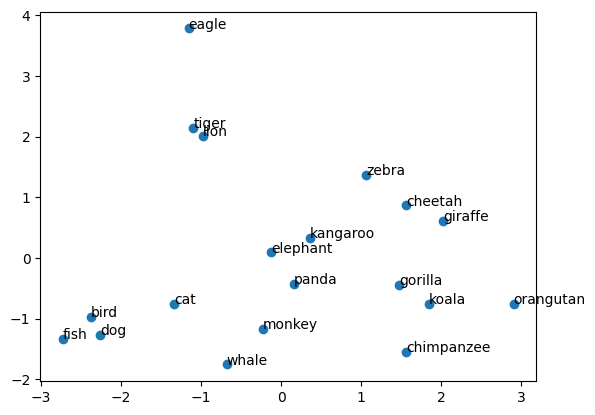

array([[-2.2627928 , -1.26903668],
       [-1.33310098, -0.75368143],
       [-2.72552096, -1.33059172],
       [-0.67865032, -1.75691055],
       [-2.37279218, -0.97281682],
       [-1.15292275,  3.78284824],
       [-0.97332015,  2.01003476],
       [-1.09740899,  2.14339578],
       [ 1.56042821,  0.86698676],
       [-0.12834114,  0.08996733],
       [ 2.02390305,  0.61246853],
       [ 1.06602856,  1.36545342],
       [ 0.36404469,  0.33247734],
       [ 1.84068006, -0.76408408],
       [ 0.16342771, -0.43142481],
       [-0.23187371, -1.16827819],
       [ 1.47123911, -0.45127986],
       [ 1.56307973, -1.54674039],
       [ 2.90389284, -0.75878762]])

In [64]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()
X_pca

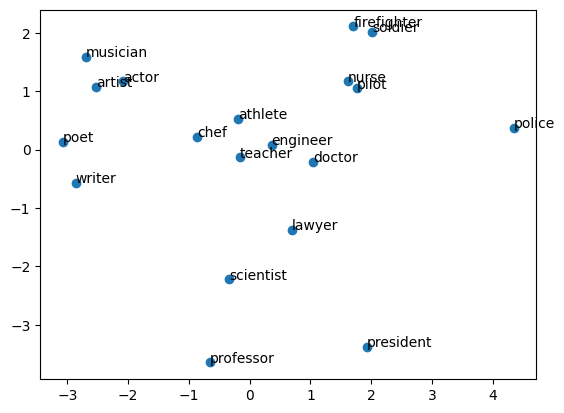

In [68]:
#repeat this process with your own set of 10-20 words. 
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.

words=["doctor","nurse","engineer","scientist","teacher","professor","president","lawyer","artist","musician","writer","poet","actor","chef","athlete","pilot","soldier","police","firefighter"]

X=[model[word] for word in words]


pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

#Does the proximity between words and overall distances make sense? 

Yes and No. There are "make sense" clusters like actor, musician, artist which are considered artistic and firefighter, soldier which are viewed phsically demanding. However, some clusters like nurse and pilot doesn't make sense, cluster of chef, athlete, teacher, engineer, and doctor also doesn't share similar traits. 

In [49]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?
twitter_model= gensim.downloader.load("glove-twitter-100")


[==================================================] 100.0% 387.1/387.1MB downloaded


Co-pilot helped me with code

Part 3: Embedding reddit posts

In [53]:
#read in uiuc csv
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])
data



,Unnamed: 0,date,post_votes,text,user,com_votes,label
0,0,2024-09-04 14:43:40,2,Have the same professor! And in lecture he did...,zhen3441,2,1
1,1,2024-09-04 14:43:40,2,Do you find it helpful to still go to the lect...,Kai2747,1,1
2,2,2024-09-04 12:52:08,3,Have you tried emailing University Housing to ...,TurboBKTastic,2,1
3,3,2024-09-04 12:52:08,3,Purchasing Illini Cash should get you added to...,HoosierCAB,2,1
4,4,2024-09-04 12:52:08,3,"Just did, thanks for the suggestion! It hadn't...",Sector-Both,1,1
...,...,...,...,...,...,...,...
3670,3670,2024-08-17 05:47:52,40,Finish what job? Eliminating terrorist organiz...,1caca1,1,0
6266,6266,2024-07-20 04:28:16,1,Pretty average. I didn’t really study much out...,Windoge_Master,1,0
2259,2259,2024-08-26 21:42:03,417,Did you befriend many in-state students? They ...,Paulskenesstan42069,4,0
3254,3254,2024-08-21 04:25:05,3,"Paid lot sounds like a safe idea, since it's j...",PP_Fang,2,0


In [70]:
#using the code from project 1, clean the text and create a bag of words representation of the text
from sklearn.feature_extraction.text import CountVectorizer
import re

def clean(text):
    text = ' '.join(text.split())
    text = text.lower()
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

data['cleaned_text'] = data['text'].apply(clean)

vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(data['cleaned_text'])

bow_df = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())
print(bow_df)

      aa  aaa  aaaaah  aaabb  aadl  aapd  aata  ab  abandoned  abbreviations  \
0      0    0       0      0     0     0     0   0          0              0   
1      0    0       0      0     0     0     0   0          0              0   
2      0    0       0      0     0     0     0   0          0              0   
3      0    0       0      0     0     0     0   0          0              0   
4      0    0       0      0     0     0     0   0          0              0   
...   ..  ...     ...    ...   ...   ...   ...  ..        ...            ...   
9445   0    0       0      0     0     0     0   0          0              0   
9446   0    0       0      0     0     0     0   0          0              0   
9447   0    0       0      0     0     0     0   0          0              0   
9448   0    0       0      0     0     0     0   0          0              0   
9449   0    0       0      0     0     0     0   0          0              0   

      ...  zones  zoo  zoom  zoomed  zo

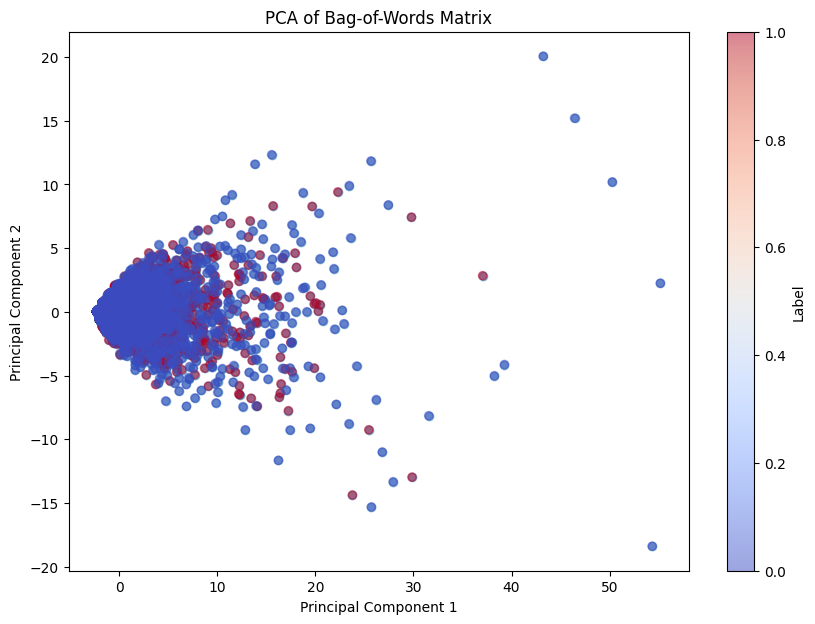

In [74]:
#using the embedding code from last week, plot a pca of all posts in the subreddits data set
pca=PCA(n_components=2)

X_pca=pca.fit_transform(bow_df)

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)

plt.title("PCA of Bag-of-Words Matrix")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

#color by the "label" column to see if the two subreddits are separable in the embedding space
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['label'], cmap='coolwarm', alpha=0.5)
plt.colorbar(label='Label')
plt.show()


# is there a clear separation between the two columns? 



There are no clear separation between the two columns. There seems to be lots of overlapping space between two columns at the left center of the plot. 

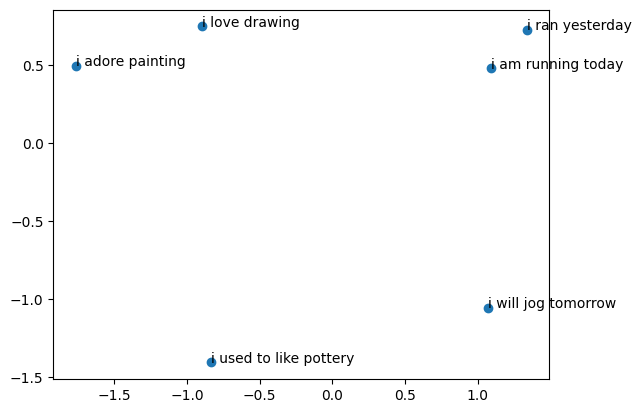

In [76]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]

#remove nan values
avg_embeddings=[embedding for embedding in avg_embeddings if not np.isnan(embedding).any()]
#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

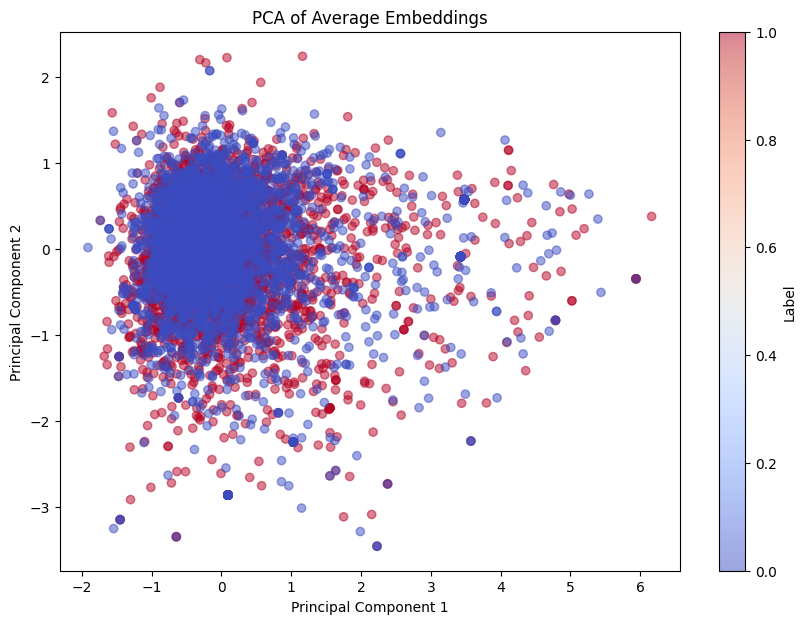

In [78]:
#use this function to calculate the average embedding of each post in the dataset
def avg_embedding(sentence, model):
    words = sentence.split()
    embeddings = [model[word] for word in words if word in model]
    if not embeddings:  
        return np.zeros(model.vector_size)  
    return np.mean(embeddings, axis=0)
avg_embeddings = [avg_embedding(sentence, model) for sentence in data['cleaned_text']]
avg_embeddings = np.array(avg_embeddings)
#plot the pca of the average embeddings, color by the "label" column
pca = PCA(n_components=2)
X_pca = pca.fit_transform(avg_embeddings)

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['label'], cmap='coolwarm', alpha=0.5)
plt.colorbar(label='Label')
plt.title("PCA of Average Embeddings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
#how is this plot different from the previous one?
#is there clear separation? 


This plot still has large overlap at the left center between UIUC and Michigan. However, relatively there are more datapoints that show some distance of seperation that can be compared. 

Co-pilot helped me with code

Part 4: HuggingFace and BERT

In [8]:
!pip install transformers

In [ ]:

#Please wait until after next week to start
%pip install importlib_metadata

# Use a pipeline as a high-level helper
from transformers import pipeline

#download bert model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")

Note: you may need to restart the kernel to use updated packages.


Downloading:   0%|          | 0.00/949 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/515M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/338 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/824k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/167 [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Please install emoji: pip3 install emoji


In [2]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I love this class")

[{'label': 'POS', 'score': 0.9923704862594604}]

In [6]:
import pandas as pd
uiuc = pd.read_csv("uiuc.csv")
mich = pd.read_csv("umich.csv")
data = pd.concat([uiuc, mich], ignore_index=True)
data

,Unnamed: 0,date,post_votes,text,user,com_votes
0,0,2024-09-04 14:43:40,2,Have the same professor! And in lecture he did...,zhen3441,2
1,1,2024-09-04 14:43:40,2,Do you find it helpful to still go to the lect...,Kai2747,1
2,2,2024-09-04 12:52:08,3,Have you tried emailing University Housing to ...,TurboBKTastic,2
3,3,2024-09-04 12:52:08,3,Purchasing Illini Cash should get you added to...,HoosierCAB,2
4,4,2024-09-04 12:52:08,3,"Just did, thanks for the suggestion! It hadn't...",Sector-Both,1
...,...,...,...,...,...,...
13059,8334,2024-07-02 12:35:36,9,It isn’t a student org,Vibes_And_Smiles,1
13060,8335,2024-07-02 11:07:10,0,Life \nMatter \nLife's matter,tctu,8
13061,8336,2024-07-02 11:07:10,0,google,SUPERazkari,4
13062,8337,2024-07-02 11:07:10,0,That’s a hard question to answer for a set of ...,Own-Resident-3837,-1


In [11]:
#use the pipeline to classify the sentiment of all posts in the reddit dataset
#report the most common sentiment label
mich = mich.sample(n=4725, random_state=42)
mich["label"] = 0
uiuc["label"] = 1

# Combine them
data = pd.concat([uiuc, mich], ignore_index=True)

# Load sentiment pipeline
pipe = pipeline(
    "text-classification",
    model="finiteautomata/bertweet-base-sentiment-analysis",
    truncation=True
)

# Clean and truncate text
texts = data['text'].astype(str).apply(lambda x: x[:512]).tolist()

# Run sentiment analysis in batches
results = pipe(texts, batch_size=16)

# Extract just the sentiment label
data['sentiment'] = [res['label'] if res else 'UNKNOWN' for res in results]

# Show counts of each label
print(data['sentiment'].value_counts())

emoji is not installed, thus not converting emoticons or emojis into text. Please install emoji: pip3 install emoji
Keyword arguments {'batch_size': 16} not recognized.
Keyword arguments {'batch_size': 16} not recognized.
Keyword arguments {'batch_size': 16} not recognized.
Keyword arguments {'batch_size': 16} not recognized.
Keyword arguments {'batch_size': 16} not recognized.
Keyword arguments {'batch_size': 16} not recognized.
Keyword arguments {'batch_size': 16} not recognized.
Keyword arguments {'batch_size': 16} not recognized.
Keyword arguments {'batch_size': 16} not recognized.
Keyword arguments {'batch_size': 16} not recognized.
Keyword arguments {'batch_size': 16} not recognized.
Keyword arguments {'batch_size': 16} not recognized.
Keyword arguments {'batch_size': 16} not recognized.
Keyword arguments {'batch_size': 16} not recognized.
Keyword arguments {'batch_size': 16} not recognized.
Keyword arguments {'batch_size': 16} not recognized.
Keyword arguments {'batch_size': 16}

sentiment
NEU    4997
NEG    2371
POS    2082
Name: count, dtype: int64


Co-pilot helped me with code

In [13]:
#look at ten sample posts and labels; do you agree with all of them? 
pd.set_option('display.max_colwidth', None)
data[['text', 'sentiment']].sample(10, random_state=42)

,text,sentiment
3470,Not serious,NEG
1608,They've told me and others that charges arn't finalized yet and we'll get an itemized receipt when they are (imo to get the heat off them until they decide they're all actually final later),NEU
8221,"I haven’t taken 334 or 428 but they seem to be pretty light and easy from what I have heard. 300 has some more work but is an easy A as long as you don’t miss any assignments. 311 is the only tough class but it was honestly one of my favorite classes. It is a moderate workload class with some weeks, especially exam weeks getting very heavy. The homeworks are hard and the last 2 labs(out of 5) are quite difficult too but if you enjoyed 215 and like circuits you’ll love this class. It is the class that is the most natural progression to 215.",POS
8845,https://lsa.umich.edu/advising\n\nyou should be able to set up an appointment on this site,NEU
7305,"As long as your classes don’t start at 8am, you’ll be fine. Oh that and don’t join a Greek organization",NEU
5312,"I kept my card inside my phone case, so it still felt flat, but I could tap to scan everywhere",NEU
9355,The water station hands out small cups. Maybe 4-6 oz. My personal pro tip is to crunch up an empty disposable water bottle and sneak it in your pocket. I fill it up at a drinking fountain.,NEU
6985,yessir,NEU
2880,"back then walking in the quad my weather app wouldn’t even load, how did y’all do anything 👁️👄👁️",NEG
7965,"There is a thing called “Michigan time” here, essentially all of your classes will end 10 minutes early to give you time to get to your next class (example being if you class was from 10am-11:30am it’ll actually end at 11:20am). All of my classes have started teaching right at the very start of class, expecting you to be there right at start time. This may not be the same for all classes tho! (Besides the ending 10 mins early).",NEU


I agree with most of them. Except, "Not Serious" is hard to say negative without seeing the whole context. (the initial post) Text like "As long as your classes don’t start at 8am, you’ll be fine. Oh that and don’t join a Greek organization" can be seen positive and negative. 

In [ ]:
#is the UIUC or Michigan subreddit more negative?
data[data['sentiment'] == 'NEG'].groupby('label').size()


label
0    1217
1    1154
dtype: int64

UIUC has 1154 negative posts. Michigan has 1217. Michigan has more negative posts by 63 posts. 